In [1]:
import OpenDartReader

api_key = '7f942045d438f45c28bc2707063b8838be98f7e6'

dart = OpenDartReader(api_key)

In [3]:
daishin_exe = dart.report('대신증권', '임원', 2022)
daishin_exe.head(2)

,rcept_no,corp_cls,corp_code,corp_name,nm,sexdstn,birth_ym,ofcps,rgist_exctv_at,fte_at,chrg_job,main_career,mxmm_shrholdr_relate,hffc_pd,tenure_end_on
0,20230316001545,Y,00110893,대신증권,이어룡,여,1953년 09월,회장,사내이사,상근,-,상명여자사범대,1항 1호 나,2004.09.24~2022.12.31,2023년 03월 31일
1,20230316001545,Y,00110893,대신증권,송혁,남,1964년 04월,부사장,미등기,상근,리테일총괄,전북대 회계학\n 대신증권 비서실장\n 대신증권 비서/브랜드본부장\n 대신증권 WM...,-,2010.04.01~2022.12.31,2024년 03월 31일


In [4]:
daishin_exe.columns = ['접수번호', '법인구분', '고유번호', '법인명', '이름', '성별', '생년월일', '직위', '등기임원여부', '상근여부', '담당업무', '주요경력', '최대주주와의관계', '재직기간', '임기만료일']

In [10]:
daishin_exe.head(3)

,이름,성별,생년월일,직위,등기임원여부,상근여부,담당업무,주요경력,최대주주와의관계,재직기간,임기만료일
0,이어룡,여,1953년 09월,회장,사내이사,상근,-,상명여자사범대,1항 1호 나,2004.09.24~2022.12.31,2023년 03월 31일
1,송혁,남,1964년 04월,부사장,미등기,상근,리테일총괄,전북대 회계학\n 대신증권 비서실장\n 대신증권 비서/브랜드본부장\n 대신증권 WM...,-,2010.04.01~2022.12.31,2024년 03월 31일
2,길기모,남,1968년 12월,전무,미등기,상근,리스크관리부문장,서울대 경제학\n 메리츠종금증권 심사팀장\n 메리츠종금증권 리스크관리본부장,-,2019.04.01~2022.12.31,2023년 03월 31일


In [11]:
temp=daishin_exe['주요경력'].str.split('\n')
colleges=temp.str.get(0)
colleges.unique()

colleges[colleges== 'University of Bath 사회과학대학원(석사)'] ='UniversityofBath 사회과학대학원(석사)'
colleges[colleges== 'Florida International University 경영대학원(박사)']='FloridaInternationalUniversity 경영대학원(박사)'
colleges[colleges== 'Ohio State University 정책대학원(박사)'] = 'OhioStateUniversity 정책대학원(박사)'

#대학, 전공으로 나누기
ttemp = colleges.str.split() 

#대학 피처 생성
daishin_exe['대학교']=ttemp.str.get(0)

tttemp = ttemp.str.get(1)
tttemp=tttemp.replace(r'[)]*', '', regex=True)
daishin_exe['전공']=tttemp

In [33]:
daishin_exe.head(3)

,이름,성별,생년월일,직위,등기임원여부,상근여부,담당업무,주요경력,최대주주와의관계,재직기간,임기만료일,대학교,전공
0,이어룡,여,1953년 09월,회장,사내이사,상근,-,상명여자사범대,1항 1호 나,2004.09.24~2022.12.31,2023년 03월 31일,상명여자사범대,NaN
1,송혁,남,1964년 04월,부사장,미등기,상근,리테일총괄,전북대 회계학\n 대신증권 비서실장\n 대신증권 비서/브랜드본부장\n 대신증권 WM...,-,2010.04.01~2022.12.31,2024년 03월 31일,전북대,회계학
2,길기모,남,1968년 12월,전무,미등기,상근,리스크관리부문장,서울대 경제학\n 메리츠종금증권 심사팀장\n 메리츠종금증권 리스크관리본부장,-,2019.04.01~2022.12.31,2023년 03월 31일,서울대,경제학


In [96]:
import pandas as pd

# 인물 가중치행렬
col = []
row = []
for i in range(len(daishin_exe)):
    col.append(daishin_exe.loc[i, '이름'])
    row.append(daishin_exe.loc[i, '이름'])


weight_matrix = pd.DataFrame(columns=col, index=row)
weight_matrix

,이어룡,송혁,길기모,박성준,이정화,권택현,정연규,김호중,정연우,이재우,...,김봉진,김병철,김상혁,이성영,정회민,이창세,김창수,원윤희,김성호,김범철
이어룡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
송혁,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
길기모,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
박성준,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
이정화,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
권택현,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
정연규,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
김호중,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
정연우,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
이재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
def calculate_weight(distance):
    a_distance = [0.7**i for i in distance]
    weight_sum = sum(a_distance)
    return weight_sum

distance = [1, 2, 4, 3, 0]
print(calculate_weight(distance))


2.7731


In [86]:
colleges_distance = pd.DataFrame(columns=col, index=row)
for i in range(0, len(daishin_exe)-1):
    for j in range(i+1, len(daishin_exe)):
        if daishin_exe.loc[i, '대학교'] == daishin_exe.loc[j, '대학교']:
            colleges_distance.iloc[i,j] = 0
        elif daishin_exe.loc[i, '전공'] == daishin_exe.loc[j, '전공']:
            colleges_distance.iloc[i,j] = 1
        else:
            colleges_distance.iloc[i, j] = 2


In [87]:
colleges_distance

,이어룡,송혁,길기모,박성준,이정화,권택현,정연규,김호중,정연우,이재우,...,김봉진,김병철,김상혁,이성영,정회민,이창세,김창수,원윤희,김성호,김범철
이어룡,NaN,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
송혁,NaN,NaN,2,2,2,2,1,2,2,2,...,2,2,2,2,2,2,2,2,2,2
길기모,NaN,NaN,NaN,2,2,2,2,2,2,2,...,2,2,2,2,2,0,2,2,2,2
박성준,NaN,NaN,NaN,NaN,2,1,2,2,1,0,...,2,2,2,2,2,2,2,2,2,1
이정화,NaN,NaN,NaN,NaN,NaN,2,2,1,2,2,...,2,2,2,1,2,2,2,2,2,2
권택현,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,1,...,2,2,2,2,2,2,2,2,2,1
정연규,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,...,2,2,2,2,2,2,2,2,2,2
김호중,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,...,2,0,2,1,2,2,2,2,2,2
정연우,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,2,2,2,2,2,2,2,2,2,1
이재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,1


In [88]:
for i in range(len(colleges_distance)):
    for j in range(len(colleges_distance)):
        colleges_distance.iloc[i][j] = round(0.7**colleges_distance.iloc[i][j],2)
        

In [89]:
colleges_distance

,이어룡,송혁,길기모,박성준,이정화,권택현,정연규,김호중,정연우,이재우,...,김봉진,김병철,김상혁,이성영,정회민,이창세,김창수,원윤희,김성호,김범철
이어룡,NaN,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,...,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49
송혁,NaN,NaN,0.49,0.49,0.49,0.49,0.7,0.49,0.49,0.49,...,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49
길기모,NaN,NaN,NaN,0.49,0.49,0.49,0.49,0.49,0.49,0.49,...,0.49,0.49,0.49,0.49,0.49,1.0,0.49,0.49,0.49,0.49
박성준,NaN,NaN,NaN,NaN,0.49,0.7,0.49,0.49,0.7,1.0,...,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.7
이정화,NaN,NaN,NaN,NaN,NaN,0.49,0.49,0.7,0.49,0.49,...,0.49,0.49,0.49,0.7,0.49,0.49,0.49,0.49,0.49,0.49
권택현,NaN,NaN,NaN,NaN,NaN,NaN,0.49,0.49,0.7,0.7,...,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.7
정연규,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49,0.49,0.49,...,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49
김호중,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49,0.49,...,0.49,1.0,0.49,0.7,0.49,0.49,0.49,0.49,0.49,0.49
정연우,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,...,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.7
이재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.7


In [90]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
df_reset=daishin_exe.reset_index()
name = []
for i in range(len(df_reset)):
    name.append(df_reset.loc[i, '이름'])

In [91]:
print(name)

['이어룡', '송혁', '길기모', '박성준', '이정화', '권택현', '정연규', '김호중', '정연우', '이재우', '이순남', '양홍석', '임민수', '김수창', '홍종국', '최근영', '김상원', '나유석', '신재범', '강준규', '강윤기', '김성원', '오익근', '박정환', '송종원', '김경렬', '김광혁', '박석원', '김성균', '최광철', '최대경', '이정훈', '김봉진', '김병철', '김상혁', '이성영', '정회민', '이창세', '김창수', '원윤희', '김성호', '김범철']


In [92]:
G.add_nodes_from(name)

for i in range(len(name)):
    for j in range(i+1, len(name)):
        G.add_edge(name[i], name[j], weight=colleges_distance.iloc[i,j])

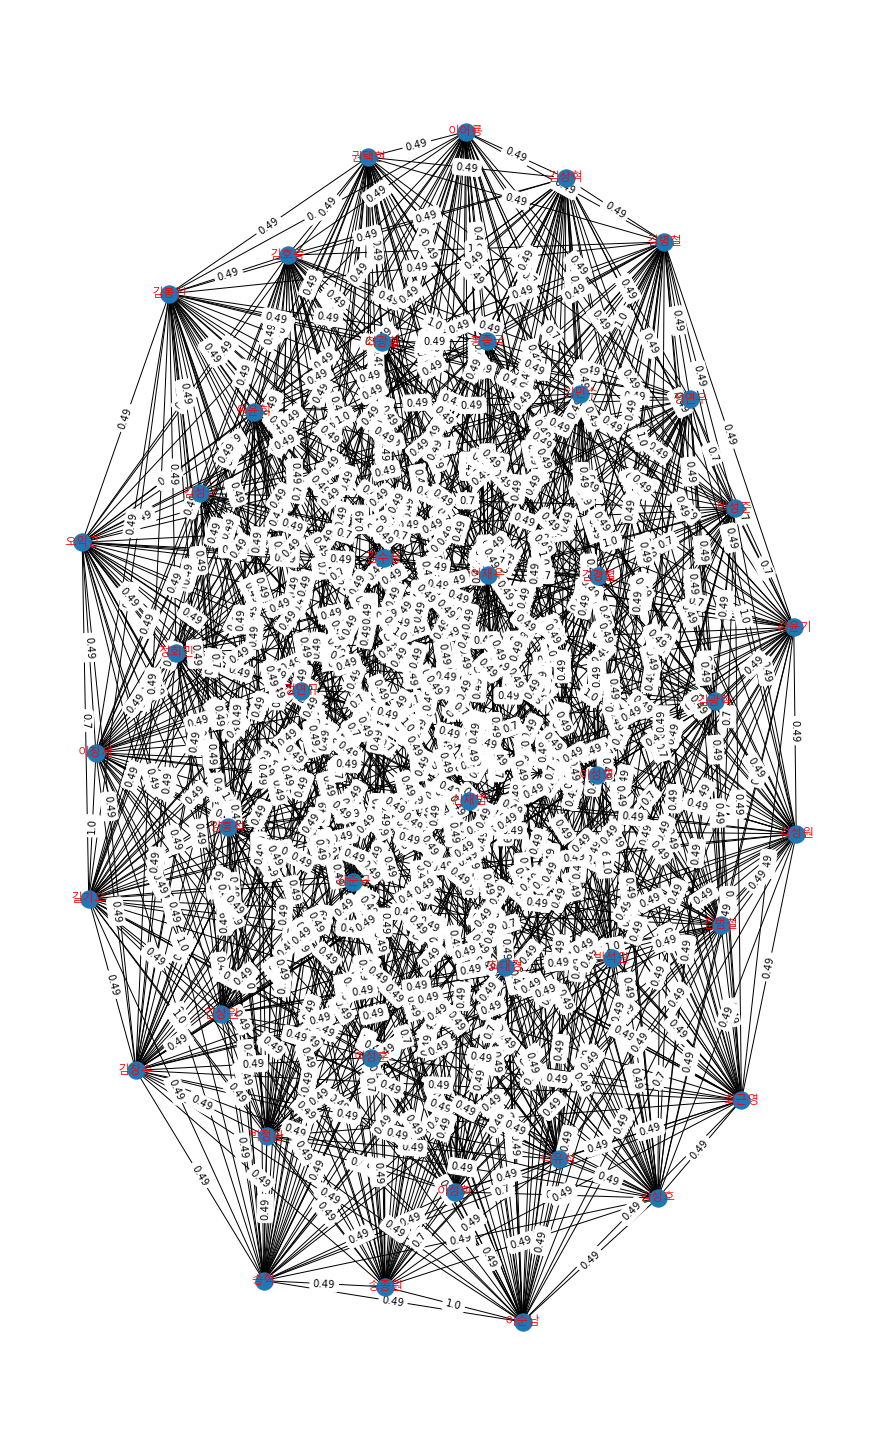

In [93]:
plt.figure(figsize=(12, 20))
plt.rcParams['font.family'] = 'Malgun Gothic'
pos = nx.spring_layout(G)  # 레이아웃 설정
nx.draw(G, pos, with_labels=True, font_family='Malgun Gothic', font_color='red')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()